Fabian Gonzalez Vera | A01367585

# Módulo 5
##  __[Project Block 2: Advanced Statistics, Part 1 - Advanced topics in multiple regression](https://rpubs.com/cdorante/tc3006c_p1)__


In [1]:
# industria asignada - Manufacturing industries

Previous course data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataf = pd.read_csv('dataus2023.csv') #Load dataset data
firmf = pd.read_csv('firmsus2023.csv')
print(dataf.shape, firmf.shape)

(533088, 22) (5615, 7)


*Merge industry with data*

In [4]:
dataf['qdate'] = pd.PeriodIndex(dataf.q, freq='Q')

In [5]:
firmf.columns

Index(['empresa', 'Nombre', 'status', 'partind', 'naics1', 'naics2',
       'SectorEconomatica'],
      dtype='object')

In [6]:
firms = firmf[['empresa','Nombre','status','naics1']] 
firms.columns=['firm','empresa','status', 'industria']

dataf = pd.merge(dataf, firms, on='firm', how='left') # Merge datasets
dataf.head()

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,adjprice,originalprice,sharesoutstanding,year,fixedassets,yearf,qdate,empresa,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.332411,104.0000,452000.000,2000,NaN,NaN,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,44.911205,73.7500,452271.967,2000,1453000.0,2000.0,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,29.801249,48.9375,453014.579,2000,1581000.0,2000.0,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,33.340861,54.7500,456366.381,2000,1741000.0,2000.0,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,18.713509,30.7300,456769.737,2001,1821000.0,2001.0,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras


In [7]:
dataf.columns

Index(['firm', 'q', 'fiscalmonth', 'revenue', 'cogs', 'sgae', 'otherincome',
       'extraordinaryitems', 'finexp', 'incometax', 'totalassets',
       'currentassets', 'inventory', 'totalliabilities', 'currentliabilities',
       'longdebt', 'adjprice', 'originalprice', 'sharesoutstanding', 'year',
       'fixedassets', 'yearf', 'qdate', 'empresa', 'status', 'industria'],
      dtype='object')

In [8]:
dataf.set_index(['firm','qdate'],inplace=True)
dataf['ry'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(4))

In [9]:

dataf['rq'] = np.log(dataf['adjprice']) - np.log(dataf.groupby(['firm'])['adjprice'].shift(1))

In [10]:
# Calculate future quarterly return

dataf['f1rq'] = dataf.groupby(['firm'])['rq'].shift(-1)
dataf['f4rq'] = dataf.groupby(['firm'])['rq'].shift(-4)

dataf['f1ry'] = dataf.groupby(['firm'])['ry'].shift(-1)
dataf['f4ry'] = dataf.groupby(['firm'])['ry'].shift(-4)

In [11]:
dataf[['rq','f1rq','ry','f4rq','f1ry','f4ry']].head(10)

rq      f1rq        ry      f4rq      f1ry      f4ry
firm qdate                                                             
A    2000Q1       NaN -0.343710       NaN -0.577538       NaN -1.219152
     2000Q2 -0.343710 -0.410137       NaN  0.056001       NaN -0.819441
     2000Q3 -0.410137  0.112233       NaN -0.508265       NaN -0.917569
     2000Q4  0.112233 -0.577538       NaN  0.377280 -1.219152 -0.652522
     2001Q1 -0.577538  0.056001 -1.219152  0.203950 -0.819441  0.128965
     2001Q2  0.056001 -0.508265 -0.819441 -0.390841 -0.917569 -0.317877
     2001Q3 -0.508265  0.377280 -0.917569 -0.593809 -0.652522 -0.403421
     2001Q4  0.377280  0.203950 -0.652522  0.318593  0.128965 -0.462108
     2002Q1  0.203950 -0.390841  0.128965 -0.311725 -0.317877 -0.977783
     2002Q2 -0.390841 -0.593809 -0.317877  0.396554 -0.403421 -0.190388

In [12]:
dataf['ebit'] = dataf['revenue'] - dataf['cogs'] - dataf['sgae']
dataf['opm'] = np.where(dataf['revenue']==0, np.NaN, dataf['ebit']/dataf['revenue'])
dataf['netincome'] = dataf['ebit'] + dataf['otherincome'] + dataf['extraordinaryitems'] - dataf['finexp'] - dataf['incometax']
dataf['pm'] = np.where(dataf['revenue']==0, np.NaN, dataf['netincome']/dataf['revenue'])
dataf['ato'] = np.where(dataf['totalassets']==0, np.NaN, dataf['revenue']/dataf['totalassets'])
dataf['acidratio'] = np.where(dataf['currentliabilities']==0, np.NaN, dataf['currentassets']/dataf['currentliabilities'])
dataf['finlev'] = np.where(dataf['totalassets']==0, np.NaN, dataf['longdebt']/dataf['totalassets'])
dataf['mvalue'] = dataf['originalprice'] * dataf['sharesoutstanding']
dataf['bookvalue'] = dataf['totalassets'] - dataf['totalliabilities']

In [13]:
manufacturyInds = dataf.loc[(dataf['industria']=='Industrias manufactureras')]
MIy22 = manufacturyInds.loc[(manufacturyInds['year']==2022)]
MIy22.head()

q  fiscalmonth    revenue       cogs       sgae  \
firm qdate                                                          
A    2022Q1  2022q1          3.0  1674000.0   764000.0   534000.0   
     2022Q2  2022q2          6.0  3281000.0  1510000.0  1035000.0   
     2022Q3  2022q3          9.0  4999000.0  2289000.0  1563000.0   
     2022Q4  2022q4         12.0  6848000.0  3126000.0  2104000.0   
AA   2022Q1  2022q1          3.0  3293000.0  2181000.0   338000.0   

             otherincome  extraordinaryitems   finexp  incometax  totalassets  \
firm qdate                                                                      
A    2022Q1     -37000.0                 0.0  20000.0    36000.0   10327000.0   
     2022Q2     -44000.0                 0.0  40000.0    95000.0   10455000.0   
     2022Q3     -41000.0                 0.0  57000.0   163000.0   10484000.0   
     2022Q4     -39000.0                 0.0  75000.0   250000.0   10532000.0   
AA   2022Q1      14000.0            -84000.0  25000.0   210000.0   15988000.0   

             ...      f4ry       ebit       opm  netincome        pm  \
firm qdate   ...                                                       
A    2022Q1  ...  0.050974   376000.0  0.224612   283000.0  0.169056   
     2022Q2  ...  0.020909   736000.0  0.224322   557000.0  0.169765   
     2022Q3  ... -0.010338  1147000.0  0.229446   886000.0  0.177235   
     2022Q4  ...       NaN  1618000.0  0.236273  1254000.0  0.183119   
AA   2022Q1  ... -0.741153   774000.0  0.235044   469000.0  0.142423   

                  ato  acidratio    finlev        mvalue  bookvalue  
firm qdate                                                           
A    2022Q1  0.162099   2.193182  0.264356  3.971400e+07  5154000.0  
     2022Q2  0.313821   2.009377  0.261119  3.547756e+07  5122000.0  
     2022Q3  0.476822   1.940063  0.260588  3.598373e+07  5091000.0  
     2022Q4  0.650209   2.030091  0.259495  4.430718e+07  5305000.0  
AA   2022Q1  0.205967   1.615118  0.108019  1.669183e+07  6257000.0  

[5 rows x 39 columns]

***
## 1.1 Descriptive Statistics

*For the Descriptive Statistics of your industry using only the most recent fiscal year observations (fiscalmonth=12, year=2022), do the following modifications:*

*For the ratios, instead of calculating the arithmetic mean of the ratios, calculate the weighted average of the ratios.* 

*Compare this weighted average with the arithmetic mean and the median. Which is the best measure for central tendency of the ratios? Interpret the weighted average of profit margin and asset turn over of your industry.*

In [14]:
aux = MIy22

print('weighted average of opm       : ', '%.3f'%(aux['ebit'].sum()/aux['revenue'].sum()))
print('weighted average of pm        : ', '%.3f'%(aux['netincome'].sum()/aux['revenue'].sum()))
print('weighted average of ato       : ', '%.3f'%(aux['revenue'].sum()/aux['totalassets'].sum()))
print('weighted average of acidratio : ', '%.3f'%(aux['currentassets'].sum()/aux['currentliabilities'].sum()))
print('weighted average of finlev    : ', '%.3f'%(aux['longdebt'].sum()/aux['totalassets'].sum()))

weighted average of opm       :  0.143
weighted average of pm        :  0.107
weighted average of ato       :  0.465
weighted average of acidratio :  1.482
weighted average of finlev    :  0.263


In [15]:
aux = MIy22[['opm','pm','ato','acidratio','finlev']]
aux.describe()

,opm,pm,ato,acidratio,finlev
count,5272.000000,5272.000000,6285.000000,6273.000000,6285.000000
mean,-25.185582,-25.395869,0.379704,5.565042,0.221564
std,294.616670,306.027779,0.481799,8.246283,0.597456
min,-10287.583333,-10483.111111,-0.014311,0.001071,0.000000
25%,-0.768249,-0.799924,0.032699,1.747670,0.023978
50%,0.018442,0.004894,0.253958,2.869306,0.150741
75%,0.125726,0.092543,0.558648,6.167385,0.312131
max,1290.294118,1245.779412,13.562387,201.084988,28.659623


***
## 1.2 Multiple Regression - advanced topics

### 1.2.1 Calculation of Variables

In [16]:
# industria asignada - Manufacturing industries

manufacturyInds['fsize'] = manufacturyInds.groupby(manufacturyInds['q'])['mvalue'].transform(lambda x: pd.qcut(x,3,labels=['small','medium','big']))
manufacturyInds['gsize'] = manufacturyInds['fsize']
manufacturyInds = pd.get_dummies(manufacturyInds,columns=['fsize'],drop_first=True, dtype=float)#,dummy_na=True)
manufacturyInds['oepsp'] = (manufacturyInds['ebit']/manufacturyInds['sharesoutstanding'])/manufacturyInds['originalprice']
manufacturyInds['epsp'] = (manufacturyInds['netincome']/manufacturyInds['sharesoutstanding'])/manufacturyInds['originalprice']
manufacturyInds['bmr'] = manufacturyInds['bookvalue']/manufacturyInds['mvalue']
MIy = manufacturyInds.loc[(manufacturyInds['status']=='activo') & (manufacturyInds['fiscalmonth']==12)]
MIy

C:\Users\fabig\AppData\Local\Temp\ipykernel_12612\2877535910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturyInds['fsize'] = manufacturyInds.groupby(manufacturyInds['q'])['mvalue'].transform(lambda x: pd.qcut(x,3,labels=['small','medium','big']))
C:\Users\fabig\AppData\Local\Temp\ipykernel_12612\2877535910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manufacturyInds['gsize'] = manufacturyInds['fsize']


q  fiscalmonth     revenue       cogs         sgae  \
firm qdate                                                             
A    2000Q4  2000q4         12.0  10773000.0  5522000.0  4198000.000   
     2001Q4  2001q4         12.0   8396000.0  5166000.0  4008000.000   
     2002Q4  2002q4         12.0   6010000.0  3694000.0  3923000.000   
     2003Q4  2003q4         12.0   6056000.0  3762000.0  3019000.000   
     2004Q4  2004q4         12.0   7181000.0  4058000.0  2737000.000   
...             ...          ...         ...        ...          ...   
ZYNE 2018Q4  2018q4         12.0        86.0        0.0    40483.830   
     2019Q4  2019q4         12.0         0.0        0.0    34319.810   
     2020Q4  2020q4         12.0         0.0        0.0    52062.542   
     2021Q4  2021q4         12.0         0.0        0.0    36770.390   
     2022Q4  2022q4         12.0         0.0        0.0    35251.540   

             otherincome  extraordinaryitems    finexp  incometax  \
firm qdate                                                          
A    2000Q4   111000.000        0.000000e+00     0.000   407000.0   
     2001Q4   301000.000        5.800000e+05     0.000   -71000.0   
     2002Q4    60000.000       -1.000000e+04     0.000  -525000.0   
     2003Q4    35000.000       -2.680000e+05     0.000  1100000.0   
     2004Q4    54000.000        0.000000e+00     0.000    91000.0   
...                  ...                 ...       ...        ...   
ZYNE 2018Q4     -474.668        0.000000e+00  -961.323        0.0   
     2019Q4     -145.911        0.000000e+00 -1522.138        0.0   
     2020Q4      481.719        0.000000e+00  -243.992        0.0   
     2021Q4     -559.681        0.000000e+00   -21.047        0.0   
     2022Q4     -631.126        7.275958e-12  -846.860        0.0   

             totalassets  ...  acidratio    finlev        mvalue    bookvalue  \
firm qdate                ...                                                   
A    2000Q4  8425000.000  ...   2.050399  0.000000  2.498606e+07  5265000.000   
     2001Q4  7986000.000  ...   2.397103  0.000000  1.321995e+07  5659000.000   
     2002Q4  8203000.000  ...   2.237506  0.140193  8.387759e+06  4627000.000   
     2003Q4  6297000.000  ...   2.040399  0.182627  1.392260e+07  2824000.000   
     2004Q4  7056000.000  ...   2.446285  0.162982  1.173287e+07  3569000.000   
...                  ...  ...        ...       ...           ...          ...   
ZYNE 2018Q4    67327.443  ...   6.884329  0.000000  5.235181e+04    57601.661   
     2019Q4    87764.596  ...   7.219675  0.001250  1.401160e+05    75596.743   
     2020Q4    74056.776  ...   5.273116  0.000000  9.714928e+04    60143.528   
     2021Q4    81171.507  ...   8.099352  0.004357  1.187065e+05    70913.334   
     2022Q4    55520.894  ...   5.971593  0.002153  2.494324e+04    46228.757   

             gsize  fsize_medium  fsize_big     oepsp      epsp       bmr  
firm qdate                                                                 
A    2000Q4    big           0.0        1.0  0.042144  0.030297  0.210718  
     2001Q4    big           0.0        1.0 -0.058850  0.013162  0.428065  
     2002Q4    big           0.0        1.0 -0.191589 -0.123036  0.551637  
     2003Q4    big           0.0        1.0 -0.052074 -0.147817  0.202836  
     2004Q4    big           0.0        1.0  0.032899  0.029745  0.304188  
...            ...           ...        ...       ...       ...       ...  
ZYNE 2018Q4  small           0.0        0.0 -0.771661 -0.762365  1.100280  
     2019Q4  small           0.0        0.0 -0.244939 -0.235117  0.539530  
     2020Q4  small           0.0        0.0 -0.535903 -0.528432  0.619084  
     2021Q4  small           0.0        0.0 -0.309759 -0.314296  0.597384  
     2022Q4  small           0.0        0.0 -1.413270 -1.404621  1.853358  

[16485 rows x 45 columns]

In [17]:
import statsmodels.api as sm
# Add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
regm = MIy.copy()
regm = regm.dropna()
x = regm[['pm','ato','epsp','oepsp','bmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

y = regm[['f1ry']]

mkmodel = sm.OLS(y,X,missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f1ry   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     279.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:38:21   Log-Likelihood:                -10238.
No. Observations:               12576   AIC:                         2.049e+04
Df Residuals:                   12568   BIC:                         2.055e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0138      0.011     -1.277   

***
## 1.2.2 Winsorization of variables

*You have to check for very extreme values for the following ratios: profit margin, asset turn over, oepsp, bmr. Apply winsorization in case of very extreme values (keep at lest 98% of original values for each winsorization). Use the histogram to decide the level of winsorization.*

In [18]:
manufacturyInds[['pm','ato','epsp','oepsp','bmr']].describe()

,pm,ato,epsp,oepsp,bmr
count,85470.000000,93014.000000,8.834300e+04,8.834300e+04,8.848200e+04
mean,-18.317029,7.013129,-inf,inf,inf
std,355.115903,1979.948288,NaN,NaN,NaN
min,-41501.684211,-0.145279,-inf,-1.793820e+05,-1.383779e+06
25%,-0.119142,0.152637,-5.015168e-02,-4.515157e-02,1.882336e-01
50%,0.034176,0.374852,9.416890e-03,1.599892e-02,3.526563e-01
75%,0.089625,0.699228,3.243069e-02,5.024122e-02,6.075316e-01
max,1533.205128,603848.692765,4.453706e+05,inf,inf


In [19]:
manufacturyInds.replace([np.inf, -np.inf], np.nan, inplace=True)
manufacturyInds[['pm','ato','epsp','oepsp','bmr',]].describe()

,pm,ato,epsp,oepsp,bmr
count,85470.000000,93014.000000,88342.000000,88342.000000,8.848100e+04
mean,-18.317029,7.013129,-1.061465,7.747287,1.849935e+02
std,355.115903,1979.948288,2229.306947,2502.772261,4.418111e+04
min,-41501.684211,-0.145279,-357470.651014,-179381.995545,-1.383779e+06
25%,-0.119142,0.152637,-0.050141,-0.045152,1.882313e-01
50%,0.034176,0.374852,0.009417,0.015999,3.526559e-01
75%,0.089625,0.699228,0.032431,0.050240,6.075151e-01
max,1533.205128,603848.692765,445370.646026,673116.999107,1.224872e+07


C:\Users\fabig\AppData\Local\Temp\ipykernel_12612\3343063742.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


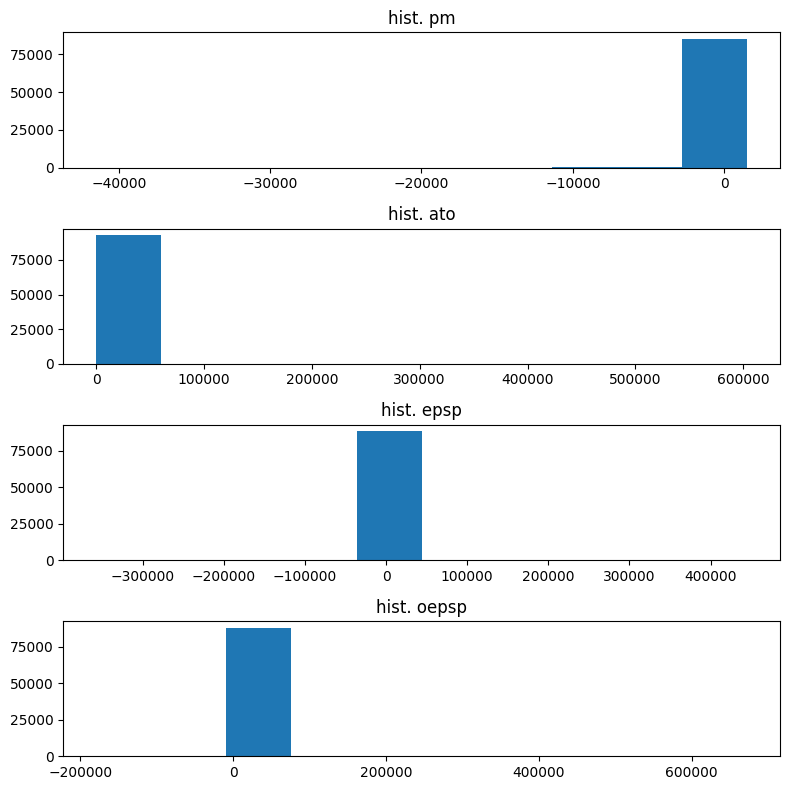

In [20]:
sv = ['pm','ato','epsp','oepsp','bmr']
f, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))
lc = 0
for c, i in enumerate(axes):
    vals = pd.DataFrame(manufacturyInds[[sv[lc]]])
    axes[c].hist(vals)
    axes[c].set_title('hist. ' + sv[lc], loc='center', wrap=True)
    lc+=1
plt.tight_layout()

C:\Users\fabig\AppData\Local\Temp\ipykernel_12612\1147042832.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


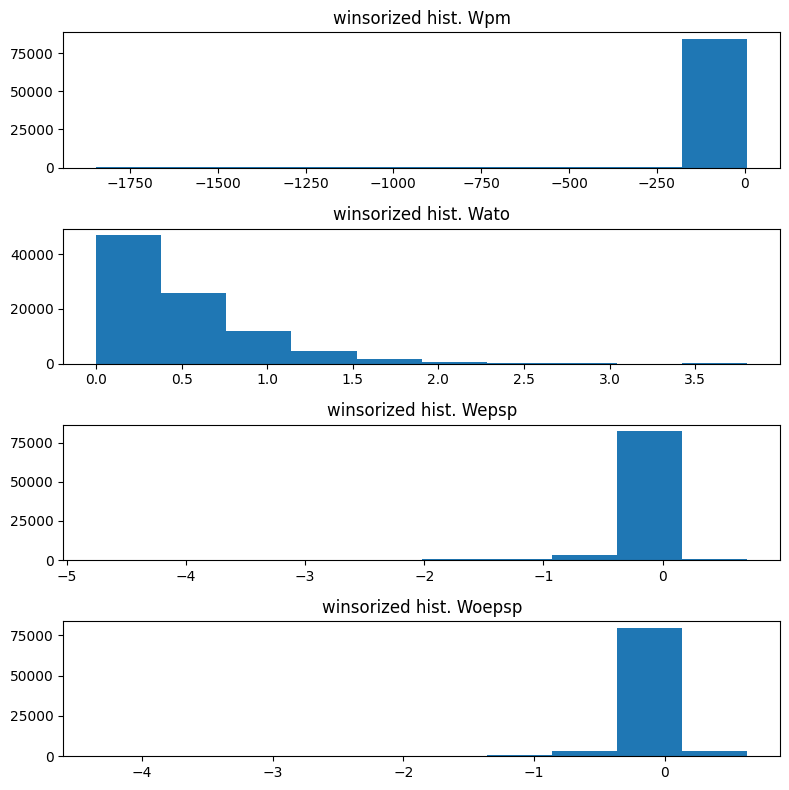

In [21]:
sv = ['Wpm','Wato','Wepsp','Woepsp','Wbmr']
wMI = manufacturyInds.copy()
wMI['Wpm'] = wMI['pm'].clip(lower=wMI['pm'].quantile(0.002,interpolation='lower'),
                            upper=wMI['pm'].quantile(0.999,interpolation='higher'))

wMI['Wato'] = wMI['ato'].clip(lower=wMI['ato'].quantile(0.002,interpolation='lower'),
                              upper=wMI['ato'].quantile(0.999,interpolation='higher'))

wMI['Wepsp'] = wMI['epsp'].clip(lower=wMI['epsp'].quantile(0.002,interpolation='lower'),
                                upper=wMI['epsp'].quantile(0.999,interpolation='higher'))

wMI['Woepsp'] = wMI['oepsp'].clip(lower=wMI['oepsp'].quantile(0.002,interpolation='lower'),
                                  upper=wMI['oepsp'].quantile(0.999,interpolation='higher'))

wMI['Wbmr'] = wMI['bmr'].clip(lower=wMI['bmr'].quantile(0.002,interpolation='lower'),
                                upper=wMI['bmr'].quantile(0.999,interpolation='higher'))

f, axes = plt.subplots(4,1, constrained_layout=True, figsize=(8,8))
lc = 0
for c,i in enumerate(axes):
    vals = pd.DataFrame(wMI[[sv[lc]]])
    #print(manufacturyInds[[sv[lc]]])
    #vals = winsorize(vals[sv[lc]], limits=[0.02, 0.02])
    axes[c].hist(vals)
    axes[c].set_title('winsorized hist. ' + sv[lc], loc='center', wrap=True)
    lc+=1
plt.tight_layout()

***
## 1.2.3 Multicollinearity
*Do the multicollienarity test considering all numeric independent variables:*

*profit margin, asset turn over, epsp, oepsp, bmr*

*Interpret the test. If there is a multicollienarity problem, propose how to solve it.*

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
mco = wMI.copy()
mco = wMI.dropna()
x = mco[['Wpm','Wato','Wepsp','Woepsp','Wbmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
#print(vif_df)
#predVars = ['Wpm','Wato','Wepsp','Woepsp','Wbmr']
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,const,6.648444
1,Wpm,1.026318
2,Wato,1.058365
3,Wepsp,6.874259
4,Woepsp,7.051031
5,Wbmr,1.076926
6,fsize_medium,1.500534
7,fsize_big,1.583075


In [23]:
mco = wMI.copy()
mco = wMI.dropna()
x = mco[['Wpm','Wato','Wepsp','Wbmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
#print(vif_df)
#predVars = ['Wpm','Wato','Wepsp','Woepsp','Wbmr']
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,const,6.628745
1,Wpm,1.025823
2,Wato,1.027900
3,Wepsp,1.116354
4,Wbmr,1.073344
5,fsize_medium,1.495424
6,fsize_big,1.576563


***
## 1.2.4 Multiple regression model
*Run a first multiple regression model to examine whether the financial ratios and firm size explain/predict future annual stock returns (one quarter later). For the ratios, use the winsorized version (if the ratio has extreme values)*

*Interpret the results of each coefficient (beta and their statistical significance). Remember that the coefficients of categorical dummies have a special interpretation.*

In [24]:
regm = wMI.copy()
regm = regm.dropna()
x = regm[['Wpm','Wato','Wepsp','Wbmr','fsize_medium','fsize_big']]
X = sm.add_constant(x)

y = regm[['f4ry']]

mkmodel = sm.OLS(y,X,missing='drop').fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4ry   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     454.8
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:38:24   Log-Likelihood:                -61479.
No. Observations:               70707   AIC:                         1.230e+05
Df Residuals:                   70700   BIC:                         1.230e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1740      0.006    -31.127   

*Add interaction terms between firm size and earnings per share deflated by price (epsp or oepsp, in case you eliminated one due to multicollienarity). Re-run the regression and INTERPRET the interaction between these two variables. Also, state the regression equation for each size group.*

*Interpret the R-squared of the model*

In [25]:
import statsmodels.formula.api as smf
formula = 'f4ry ~ Wpm + Wato + Wepsp + Wbmr + fsize_medium + fsize_big + fsize_medium:Wepsp + fsize_big:Wepsp'
regInts = smf.ols(formula,data=regm).fit()
print(regInts.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4ry   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     341.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:38:24   Log-Likelihood:                -61478.
No. Observations:               70707   AIC:                         1.230e+05
Df Residuals:                   70698   BIC:                         1.231e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.1741      0

*Run a multiple regression but now using only the last complete year of data (yearf=2022)*

*What differences do you see compared with the previous model? Explain*


In [26]:
regm = wMI.copy()
regm = regm.loc[(regm['year']==2022)]
regm = regm.dropna()
regInts = smf.ols(formula,data=regm).fit()
print(regInts.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4ry   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          3.47e-167
Time:                        20:38:24   Log-Likelihood:                -3630.0
No. Observations:                3522   AIC:                             7278.
Df Residuals:                    3513   BIC:                             7334.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6808      0

***
## 1.2.5 Regression Diagnosis
*Do a diagnosis for possible outliers and influential observations, but using only annual data for 2022. You will end up with a cross-sectional sample with the most recent financial information.*


In [27]:
# regression diagnosis

sample22 = wMI.copy()
sample22 = sample22.loc[(sample22['year']==2022)]

In [28]:
sample22

q  fiscalmonth    revenue       cogs         sgae  \
firm qdate                                                            
A    2022Q1  2022q1          3.0  1674000.0   764000.0   534000.000   
     2022Q2  2022q2          6.0  3281000.0  1510000.0  1035000.000   
     2022Q3  2022q3          9.0  4999000.0  2289000.0  1563000.000   
     2022Q4  2022q4         12.0  6848000.0  3126000.0  2104000.000   
AA   2022Q1  2022q1          3.0  3293000.0  2181000.0   338000.000   
...             ...          ...        ...        ...          ...   
ZWS  2022Q4  2022q4         12.0  1281800.0   816300.0   358400.000   
ZYNE 2022Q1  2022q1          3.0        0.0        0.0     8903.915   
     2022Q2  2022q2          6.0        0.0        0.0    18072.685   
     2022Q3  2022q3          9.0        0.0        0.0    26565.561   
     2022Q4  2022q4         12.0        0.0        0.0    35251.540   

             otherincome  extraordinaryitems     finexp  incometax  \
firm qdate                                                           
A    2022Q1   -37000.000        0.000000e+00  20000.000    36000.0   
     2022Q2   -44000.000        0.000000e+00  40000.000    95000.0   
     2022Q3   -41000.000        0.000000e+00  57000.000   163000.0   
     2022Q4   -39000.000        0.000000e+00  75000.000   250000.0   
AA   2022Q1    14000.000       -8.400000e+04  25000.000   210000.0   
...                  ...                 ...        ...        ...   
ZWS  2022Q4     3600.000        4.700000e+03  26900.000    26800.0   
ZYNE 2022Q1      317.252        0.000000e+00    -96.044        0.0   
     2022Q2     -458.675        0.000000e+00   -187.735        0.0   
     2022Q3     -893.803        0.000000e+00   -439.590        0.0   
     2022Q4     -631.126        7.275958e-12   -846.860        0.0   

              totalassets  ...  fsize_medium  fsize_big     oepsp      epsp  \
firm qdate                 ...                                                
A    2022Q1  1.032700e+07  ...           0.0        1.0  0.009468  0.007126   
     2022Q2  1.045500e+07  ...           0.0        1.0  0.020746  0.015700   
     2022Q3  1.048400e+07  ...           0.0        1.0  0.031876  0.024622   
     2022Q4  1.053200e+07  ...           0.0        1.0  0.036518  0.028302   
AA   2022Q1  1.598800e+07  ...           0.0        1.0  0.046370  0.028098   
...                   ...  ...           ...        ...       ...       ...   
ZWS  2022Q4  2.864000e+06  ...           0.0        1.0  0.028481  0.016408   
ZYNE 2022Q1  7.438103e+04  ...           0.0        0.0 -0.102325 -0.097575   
     2022Q2  6.700696e+04  ...           0.0        0.0 -0.363640 -0.369092   
     2022Q3  6.236674e+04  ...           0.0        0.0 -0.793209 -0.806771   
     2022Q4  5.552089e+04  ...           0.0        0.0 -1.413270 -1.404621   

                  bmr       Wpm      Wato     Wepsp    Woepsp      Wbmr  
firm qdate                                                               
A    2022Q1  0.129778  0.169056  0.162099  0.007126  0.009468  0.129778  
     2022Q2  0.144373  0.169765  0.313821  0.015700  0.020746  0.144373  
     2022Q3  0.141481  0.177235  0.476822  0.024622  0.031876  0.141481  
     2022Q4  0.119732  0.183119  0.650209  0.028302  0.036518  0.119732  
AA   2022Q1  0.374854  0.142423  0.205967  0.028098  0.046370  0.374854  
...               ...       ...       ...       ...       ...       ...  
ZWS  2022Q4  0.429481  0.048135  0.447556  0.016408  0.028481  0.429481  
ZYNE 2022Q1  0.748904       NaN  0.000000 -0.097575 -0.102325  0.748904  
     2022Q2  1.151762       NaN  0.000000 -0.369092 -0.363640  1.151762  
     2022Q3  1.575240       NaN  0.000000 -0.806771 -0.793209  1.575240  
     2022Q4  1.853358       NaN  0.000000 -1.404621 -1.413270  1.853358  

[9096 rows x 50 columns]

*Using this cross-sectional dataset with only annual data for 2022, you have to do the following:*

- *Using matrix algebra calculate the beta coefficients of the same regression model*

In [29]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sample22['constant'] = 1
selcols = ['constant','Wpm','Wato','Wepsp','Wbmr','fsize_medium','fsize_big']
sample22 = sample22.dropna()
# I set x as a matrix with the column of 1's and the values of X:
x = sample22[selcols].values
# I set y as the dependent variable:
y = sample22['f4ry'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients) 
betas = np.matmul(invtxt,xty)
betas

array([-6.86008489e-01,  3.10969120e-04,  3.48029483e-01,  3.98692998e-01,
        1.57057336e-01,  3.11882054e-01,  5.33036060e-01])

- *Using matrix algebra calculate the Hat Matrix*

In [30]:
#HAT = X((X'X)^-1)*X'
xtranspose = x.transpose() # X'
xtxinv = np.linalg.inv(np.matmul(xtranspose,x)) #(X'X)^-1
xmxtxinv = np.matmul(x,xtxinv) #X((X'X)^-1)
hat = np.matmul(xmxtxinv,xtranspose) # X((X'X)^-1)*X'
hat

array([[0.0008549 , 0.0007733 , 0.00068842, ..., 0.00084055, 0.00071609,
        0.00073495],
       [0.0007733 , 0.00073861, 0.000704  , ..., 0.00077446, 0.00072147,
        0.00070457],
       [0.00068842, 0.000704  , 0.00072353, ..., 0.00070753, 0.00073112,
        0.00067131],
       ...,
       [0.00084055, 0.00077446, 0.00070753, ..., 0.00083793, 0.00073701,
        0.00072146],
       [0.00071609, 0.00072147, 0.00073112, ..., 0.00073701, 0.00074502,
        0.00067522],
       [0.00073495, 0.00070457, 0.00067131, ..., 0.00072146, 0.00067522,
        0.00071051]])

- *With the hat matrix identify possible leverage observations. EXPLAIN why these observations can be leverage points.*

In [31]:
# Leverages are the diagonal of the hat matrix, because a leverage is hii
highLevObs = []
levs = np.diag(hat)
mlevValby3 = 3 * ((len(selcols) + 1)/len(sample22)) # 3((k+1)/n), where k is number of parameters & n is number of datapoints
for i in levs:
    if i > mlevValby3:
        highLevObs.append(i)

print('mean leverage value times 3: ',mlevValby3)
print('Number of X values with potentially large influence:',len(highLevObs))
print('X values that have potentially large influence:')
possibleLeverageObs = pd.DataFrame(highLevObs)
possibleLeverageObs

mean leverage value times 3:  0.0068143100511073255
Number of X values with potentially large influence: 108
X values that have potentially large influence:


,0
0,0.014348
1,0.007935
2,0.020883
3,0.064864
4,0.065006
...,...
103,0.017409
104,0.042045
105,0.045720
106,0.008209


- *Identify possible outliers using studentized residuals. EXPLAIN your criteria to identify these outliers, and how studentized residuals work.*

In [32]:
influence = regInts.get_influence()
studentized_residuals = (influence.resid_studentized_external)

st_outliers = []
st_outliers_aux = []
c=0
for i in studentized_residuals:
    if i >= 3: 
        st_outliers.append(i)
        st_outliers_aux.append(c)
    c=c+1
    
print('Possible Outliers detected using studentized residuals:')
d = {'studentized_res': st_outliers, 'pos': st_outliers_aux}
st_outliersdf = pd.DataFrame(data=d)
st_outliersdf

Possible Outliers detected using studentized residuals:


,studentized_res,pos
0,3.005122,8
1,3.399535,46
2,3.525343,122
3,3.247189,168
4,3.519988,249
5,3.251068,262
6,3.801481,263
7,3.135071,1324
8,3.422450,2566
9,3.691149,2642


In [33]:
len(studentized_residuals)

3522

- *Identify possible outliers using Cook’s distance. EXPLAIN your criteria to identify outliers with Cook’s distance and how they work.*

In [34]:
'''
Cook´s Distance guidelines
Some texts say that:
    If Di is greater than 0.5, then the ith data point is worthy of further investigation as it may be influential.
    If Di is greater than 1, then the ith data point is quite likely to be influential.
    Or, if Di sticks out like a sore thumb from the other Di values, it is almost certainly influential.
Other texts say that:
    The threshold for considering a data point influential is if Di > 4/(N-K-1), where N is num of obs, K is num of variables
    if the Di is greater that three times the mean of cook´s distance then it might be an outliers
'''
cooks_d = influence.cooks_distance
cook_outliers1 = []
cook_outliers2 = []
cook_outliers3 = []
cook_outliers1aux = []
cook_outliers2aux = []
cook_outliers3aux = []

c=0
for i in cooks_d[0]:
    if i >= 0.5: 
        cook_outliers1.append(i)
        cook_outliers1aux.append(c)
    if i >= 3*np.mean(cooks_d[0]): 
        cook_outliers2.append(i)
        cook_outliers2aux.append(c)
    if i >= 4/(len(selcols)-len(sample22)-1): 
        cook_outliers3.append(i)
        cook_outliers3aux.append(c)
    c+=1
        #cook_outliers.append(i)
    
#print('Possible Outliers detected using Cook´s distance:')
print('Greater than 0.5, produces possible outliers: ',len(cook_outliers1))
print('Greater than 3 times the mean of distance, produces possible outliers: ',len(cook_outliers2)) 
print('Greater than 4/(N-K-1), produces possible outliers: ',len(cook_outliers3))



Greater than 0.5, produces possible outliers:  0
Greater than 3 times the mean of distance, produces possible outliers:  178
Greater than 4/(N-K-1), produces possible outliers:  3522


Given the number of possible outliers the most likely to be correct cutoff value for Cook´s Distance is 3 times the mean of distance, because is the value is greater than 0.5 detected 0 possible outliers meanwhile if the Di value is Greater than 4/(N-K-1) it detected the entire dataset as a possible outlier, leaving us with  3 times the mean of distance as the cut-off value.

In [35]:
print('Possible Outliers detected using Cook´s distance:')
d = {'Cook_d': cook_outliers2, 'pos': cook_outliers2aux}
cook_outliersdf = pd.DataFrame(data=d)
cook_outliersdf

Possible Outliers detected using Cook´s distance:


,Cook_d,pos
0,0.007601,7
1,0.003249,8
2,0.005413,20
3,0.002197,34
4,0.003449,44
...,...,...
173,0.003697,3428
174,0.008158,3429
175,0.002991,3430
176,0.005332,3501


- *Using studentized residuals and Cook’s distance identify possible influential observations. EXPLAIN your criteria.*
- *List the influential observations and decide whether to drop them or keep some of them*

In [36]:
dataf = pd.merge(cook_outliersdf, st_outliersdf, on='pos', how='left') # Merge datasets
dataf = dataf.dropna()
dataf

,Cook_d,pos,studentized_res
1,0.003249,8,3.005122
6,0.090161,46,3.399535
18,0.006739,122,3.525343
19,0.001486,168,3.247189
23,0.024734,249,3.519988
25,0.001912,262,3.251068
26,0.002635,263,3.801481
78,0.007389,1324,3.135071
122,0.002627,2566,3.422450
126,0.004194,2642,3.691149


In [37]:
dropObs = wMI.copy()
dropObs = dropObs.loc[(dropObs['year']==2022)]
dropObs = dropObs.drop(dropObs.iloc[list(dataf.pos)].index)
dropObs
#dropObs.index

q  fiscalmonth    revenue       cogs         sgae  \
firm qdate                                                            
A    2022Q1  2022q1          3.0  1674000.0   764000.0   534000.000   
     2022Q2  2022q2          6.0  3281000.0  1510000.0  1035000.000   
     2022Q3  2022q3          9.0  4999000.0  2289000.0  1563000.000   
     2022Q4  2022q4         12.0  6848000.0  3126000.0  2104000.000   
AA   2022Q1  2022q1          3.0  3293000.0  2181000.0   338000.000   
...             ...          ...        ...        ...          ...   
ZWS  2022Q4  2022q4         12.0  1281800.0   816300.0   358400.000   
ZYNE 2022Q1  2022q1          3.0        0.0        0.0     8903.915   
     2022Q2  2022q2          6.0        0.0        0.0    18072.685   
     2022Q3  2022q3          9.0        0.0        0.0    26565.561   
     2022Q4  2022q4         12.0        0.0        0.0    35251.540   

             otherincome  extraordinaryitems     finexp  incometax  \
firm qdate                                                           
A    2022Q1   -37000.000        0.000000e+00  20000.000    36000.0   
     2022Q2   -44000.000        0.000000e+00  40000.000    95000.0   
     2022Q3   -41000.000        0.000000e+00  57000.000   163000.0   
     2022Q4   -39000.000        0.000000e+00  75000.000   250000.0   
AA   2022Q1    14000.000       -8.400000e+04  25000.000   210000.0   
...                  ...                 ...        ...        ...   
ZWS  2022Q4     3600.000        4.700000e+03  26900.000    26800.0   
ZYNE 2022Q1      317.252        0.000000e+00    -96.044        0.0   
     2022Q2     -458.675        0.000000e+00   -187.735        0.0   
     2022Q3     -893.803        0.000000e+00   -439.590        0.0   
     2022Q4     -631.126        7.275958e-12   -846.860        0.0   

              totalassets  ...  fsize_medium  fsize_big     oepsp      epsp  \
firm qdate                 ...                                                
A    2022Q1  1.032700e+07  ...           0.0        1.0  0.009468  0.007126   
     2022Q2  1.045500e+07  ...           0.0        1.0  0.020746  0.015700   
     2022Q3  1.048400e+07  ...           0.0        1.0  0.031876  0.024622   
     2022Q4  1.053200e+07  ...           0.0        1.0  0.036518  0.028302   
AA   2022Q1  1.598800e+07  ...           0.0        1.0  0.046370  0.028098   
...                   ...  ...           ...        ...       ...       ...   
ZWS  2022Q4  2.864000e+06  ...           0.0        1.0  0.028481  0.016408   
ZYNE 2022Q1  7.438103e+04  ...           0.0        0.0 -0.102325 -0.097575   
     2022Q2  6.700696e+04  ...           0.0        0.0 -0.363640 -0.369092   
     2022Q3  6.236674e+04  ...           0.0        0.0 -0.793209 -0.806771   
     2022Q4  5.552089e+04  ...           0.0        0.0 -1.413270 -1.404621   

                  bmr       Wpm      Wato     Wepsp    Woepsp      Wbmr  
firm qdate                                                               
A    2022Q1  0.129778  0.169056  0.162099  0.007126  0.009468  0.129778  
     2022Q2  0.144373  0.169765  0.313821  0.015700  0.020746  0.144373  
     2022Q3  0.141481  0.177235  0.476822  0.024622  0.031876  0.141481  
     2022Q4  0.119732  0.183119  0.650209  0.028302  0.036518  0.119732  
AA   2022Q1  0.374854  0.142423  0.205967  0.028098  0.046370  0.374854  
...               ...       ...       ...       ...       ...       ...  
ZWS  2022Q4  0.429481  0.048135  0.447556  0.016408  0.028481  0.429481  
ZYNE 2022Q1  0.748904       NaN  0.000000 -0.097575 -0.102325  0.748904  
     2022Q2  1.151762       NaN  0.000000 -0.369092 -0.363640  1.151762  
     2022Q3  1.575240       NaN  0.000000 -0.806771 -0.793209  1.575240  
     2022Q4  1.853358       NaN  0.000000 -1.404621 -1.413270  1.853358  

[9081 rows x 50 columns]

- *Re-run the multiple regression model without the influential observation.
Compare the model with the previous one. Which model was better? Explain the differences*


In [38]:
regm = dropObs.copy()
regm = regm.dropna()
regdInfObs = smf.ols(formula,data=regm).fit()
print(regdInfObs.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4ry   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     113.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          4.78e-169
Time:                        20:38:35   Log-Likelihood:                -3618.6
No. Observations:                3515   AIC:                             7255.
Df Residuals:                    3506   BIC:                             7311.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6662      0

In [39]:
# Previous model
print(regInts.summary())

                            OLS Regression Results                            
Dep. Variable:                   f4ry   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          3.47e-167
Time:                        20:38:35   Log-Likelihood:                -3630.0
No. Observations:                3522   AIC:                             7278.
Df Residuals:                    3513   BIC:                             7334.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6808      0